In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
%matplotlib inline

**[2]. ** 
(я не поняла какую именно сделать гистограмму, всего или первых пяти записей, поэтому сделала две, на всякий случай)

In [44]:
data = pd.read_csv('/Users/kate/Jupyter Notebook/c2w1.csv', index_col='Index')
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


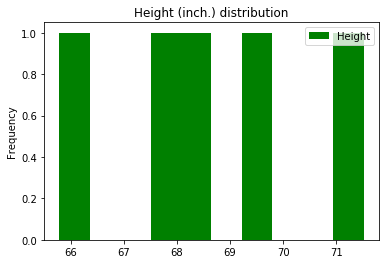

In [45]:
newdata = data.head(5)
newdata.plot(y='Height', kind='hist', 
           color='green',  title='Height (inch.) distribution')

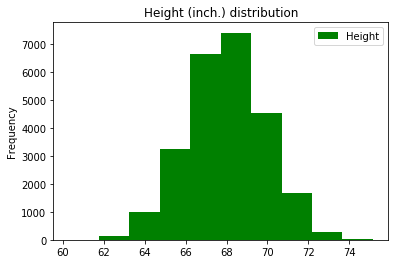

In [46]:
data.plot(y='Height', kind='hist', 
           color='green',  title='Height (inch.) distribution')

In [47]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [48]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

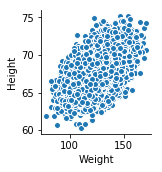

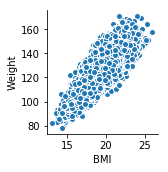

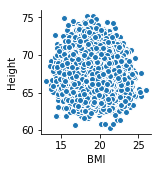

In [49]:
hw = sns.pairplot(data=data,
                  x_vars=['Weight'],
                  y_vars=['Height'])

bw = sns.pairplot(data=data,
                  x_vars=['BMI'],
                  y_vars=['Weight'])

bh = sns.pairplot(data=data,
                  x_vars=['BMI'],
                  y_vars=['Height'])

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

(опять же, непонятно в фунтах или килограммах данные, я решила, что в фунтах)

In [50]:
def weight_category(weight):
    if weight < 120:
        return 1
    if weight < 150:
        return 3
    return 2

data['Weight_cat'] = data['Weight'].apply(weight_category)

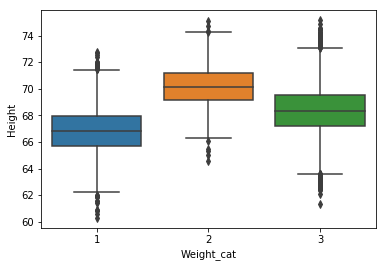

In [51]:
ax = sns.boxplot(x="Weight_cat", y="Height", data=data)

**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

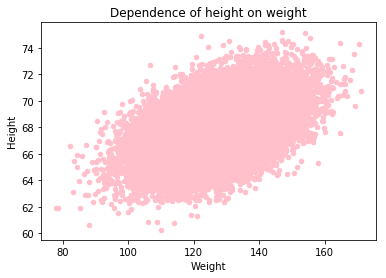

In [52]:
data.plot(y='Height', x = 'Weight', kind='scatter', 
           color='pink',  title='Dependence of height on weight')

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [84]:
def error(w_0, w_1, height, weight, n):
    error = 0
    xlist = []
    ylist = []
    np_height = height.as_matrix()
    np_weight = weight.as_matrix()
    for i in range(n):
        xlist.append(int(i))
        ylist.append(error)
        error += (np_height[i] - (w_0 + w_1*np_weight[i]))**2
    return ylist, xlist

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

In [86]:
error1, xlist = error(60, 0.05, data['Height'], data['Weight'], data.shape[0])
error2, xlist = error(50, 0.16, data['Height'], data['Weight'], data.shape[0])

[0, 200, 0, 200]

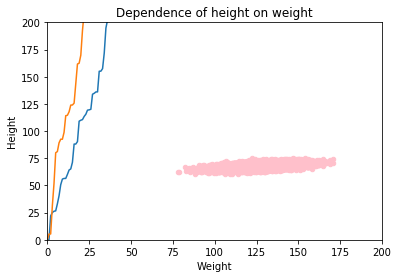

In [87]:
data.plot(y = 'Height', x = 'Weight', kind='scatter', 
           color='pink',  title='Dependence of height on weight')
plt.plot(xlist, error1)
plt.plot(xlist, error2)

plt.axis([0, 200, 0, 200])


In [57]:
# from IPython import get_ipython
# get_ipython().magic('reset -sf')

In [31]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.optimize import minimize_scalar
# %matplotlib inline

In [58]:
# data = pd.read_csv('/Users/kate/Jupyter Notebook/c2w1.csv', index_col='Index')

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

In [65]:
def error(w_0, w_1, height, weight, n):
    
    error = 0.0
    
    xlist = []
    ylist = []
    w1list = []
    
    np_height = height.as_matrix()
    np_weight = weight.as_matrix()
    
    for i in range(n):
        xlist.append(int(i))
        ylist.append(error)
        w1list.append(w_1)
        
        error += (np_height[i] - (w_0 + w_1*np_weight[i]))**2
        
    return w1list, ylist

[0.125, 0.17, 0, 2]

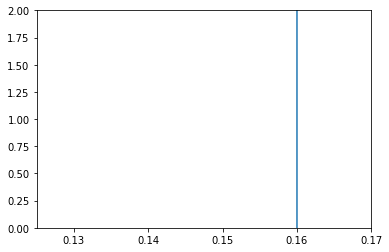

In [78]:
w1list, ylist = error(50.0, 0.16, data['Height'], data['Weight'], data.shape[0])
# print(w1list)
# print(ylist)
plt.plot(w1list, error2)
plt.axis([0.125, 0.170, 0, 2])

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [125]:
def error(w_0, w_1, height, weight, n):
    
    error = 0.0
    
    xlist = []
    ylist = []
    
    np_height = np.array(height)
    np_weight = np.array(weight)
    
    for i in range(n):
        xlist.append(int(i))
        ylist.append(error)
        error += (np_height[i] - (w_0 + w_1*np_weight[i]))**2
        
    return ylist

In [126]:
height = data['Height'].as_matrix()
weight = data['Weight'].as_matrix()
n = data.shape[0]

minimize_scalar(lambda w_1: error(50, w_1, height, weight, n), bounds=(-5,5))

TypeError: unsupported operand type(s) for -: 'list' and 'list'